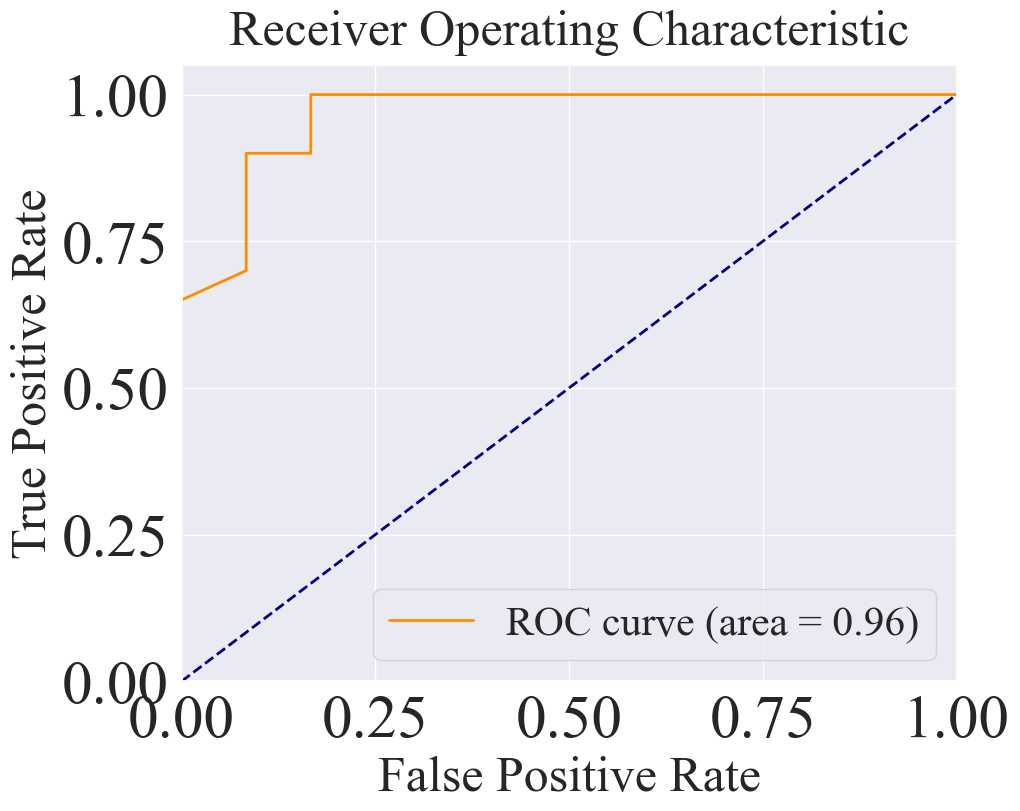

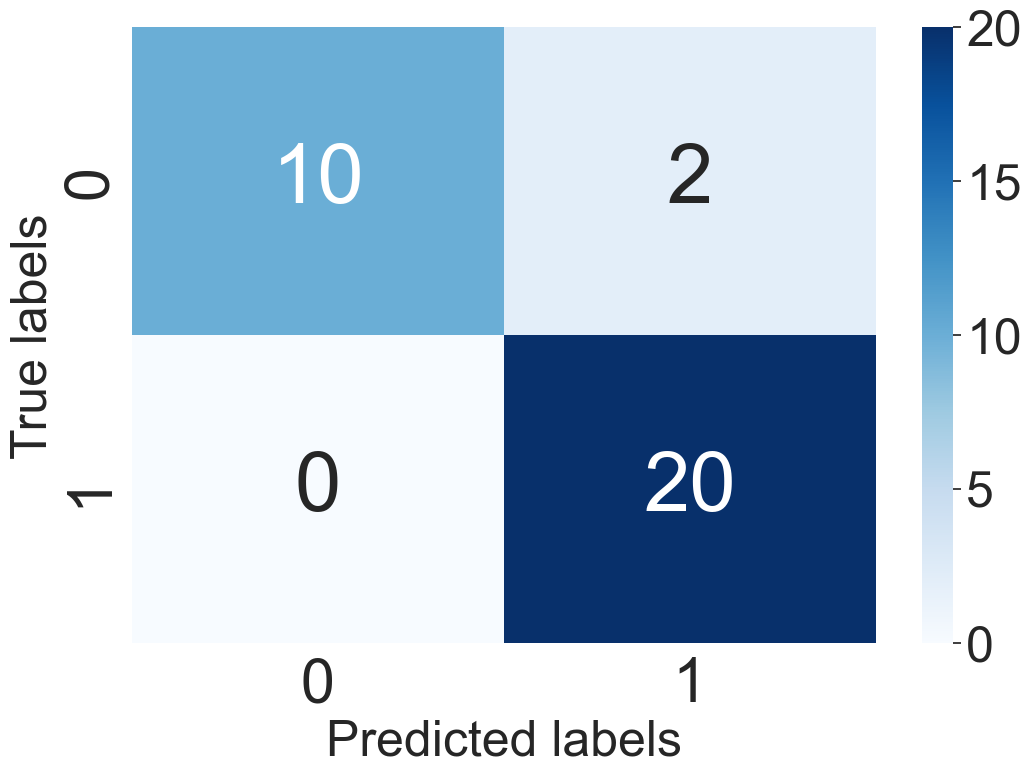

AUC Score: 0.9645833333333333
Sensitivity: 1.0
Accuracy: 0.9375
Confusion Matrix:
[[10  2]
 [ 0 20]]
Specificity: 0.8333333333333334
Precision: 0.9090909090909091


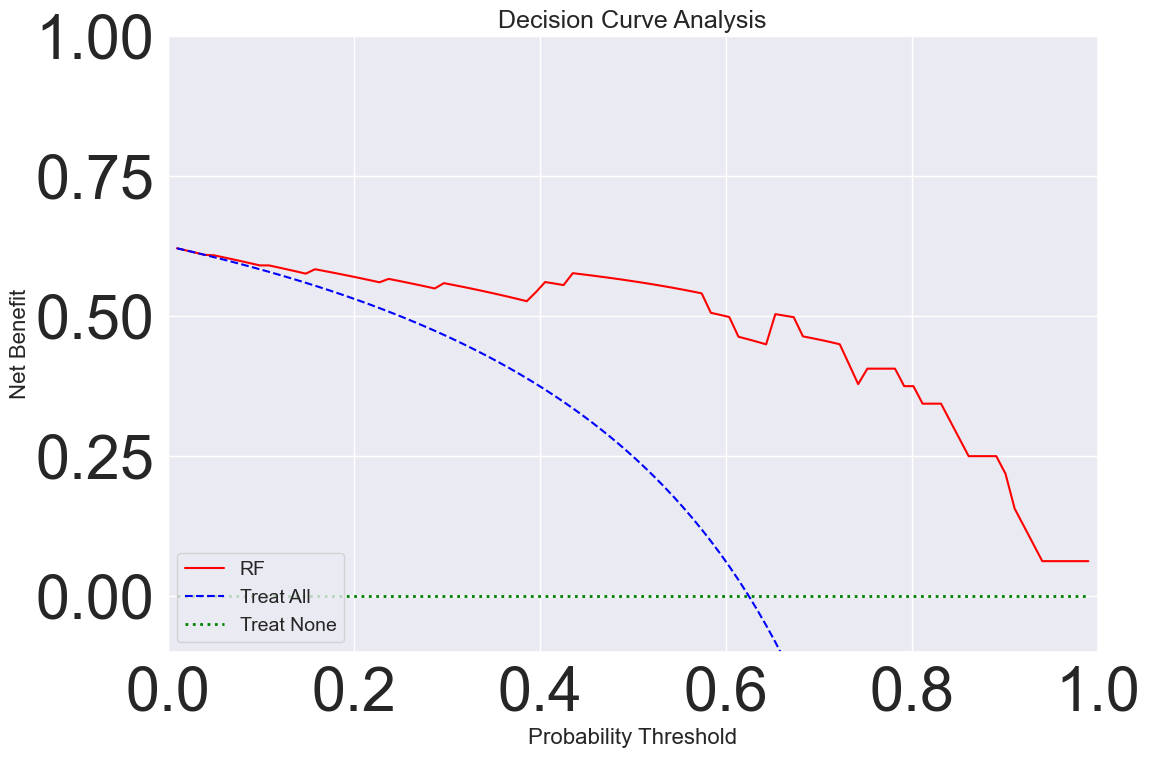

In [3]:
#随机森林
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv4/train_t2_icc_selection.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv4/test_t2_icc_selection.csv')
# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 3. 初始化并训练随机森林模型
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
# 4. 使用测试集评估模型

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('ICC feature-Random forest', fontsize=36, y=1.02)  # 调整标题位置
plt.show()
# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)
# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

print("Specificity:", specificity)
print("Precision:", precision)

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate net benefit for the model
def calculate_net_benefit(thresholds, y_true, y_proba):
    net_benefits = []
    for threshold in thresholds:
        w = threshold / (1 - threshold)  # Weight for false positives
        predictions = y_proba >= threshold  # Predictions based on the current threshold
        tp = np.sum((predictions == 1) & (y_true == 1))  # True positives
        fp = np.sum((predictions == 1) & (y_true == 0))  # False positives
        net_benefit = tp - (fp * w)  # Calculate net benefit
        net_benefits.append(net_benefit / len(y_true))
    return net_benefits

# Calculate net benefit for "All" treated (assumes all cases are positive)
def net_benefit_all(thresholds, y_true):
    prevalence = np.mean(y_true)
    return [prevalence - (1 - prevalence) * (threshold / (1 - threshold)) for threshold in thresholds]

# Calculate net benefit for "None" treated (assumes no cases are positive)
def net_benefit_none(thresholds):
    return [0 for _ in thresholds]

# Range of thresholds from 0.01 to 0.99
thresholds = np.linspace(0.01, 0.99, 100)

# Calculate net benefits
model_net_benefits = calculate_net_benefit(thresholds, y_test, y_pred_proba)
all_net_benefits = net_benefit_all(thresholds, y_test)
none_net_benefits = net_benefit_none(thresholds)

# Plot Decision Curve Analysis
plt.figure(figsize=(12, 8))
plt.plot(thresholds, model_net_benefits, label='RF', color='red')
plt.plot(thresholds, all_net_benefits, label='Treat All', color='blue', linestyle='--')
plt.plot(thresholds, none_net_benefits, label='Treat None', color='green', linestyle=':', linewidth=2)
plt.xlabel('Probability Threshold', fontsize=16)
plt.ylabel('Net Benefit', fontsize=16)
plt.title('Decision Curve Analysis', fontsize=18)
plt.legend(loc='lower left', fontsize=14)
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([-0.1, 1])  # Adjust Y-axis to slightly below zero for visibility
plt.show()



C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\xiao\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


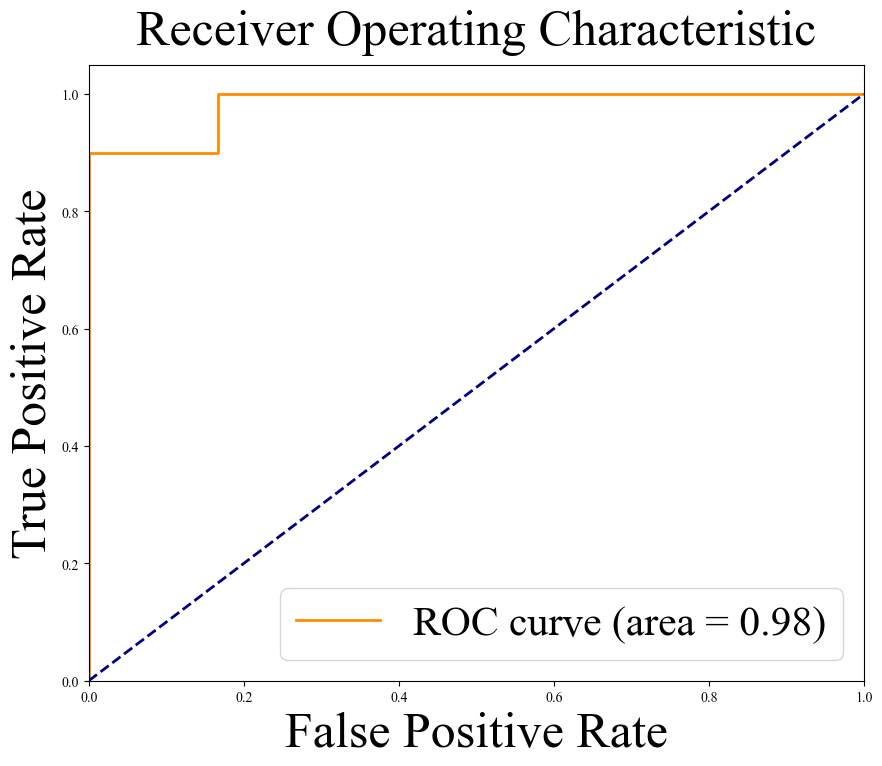

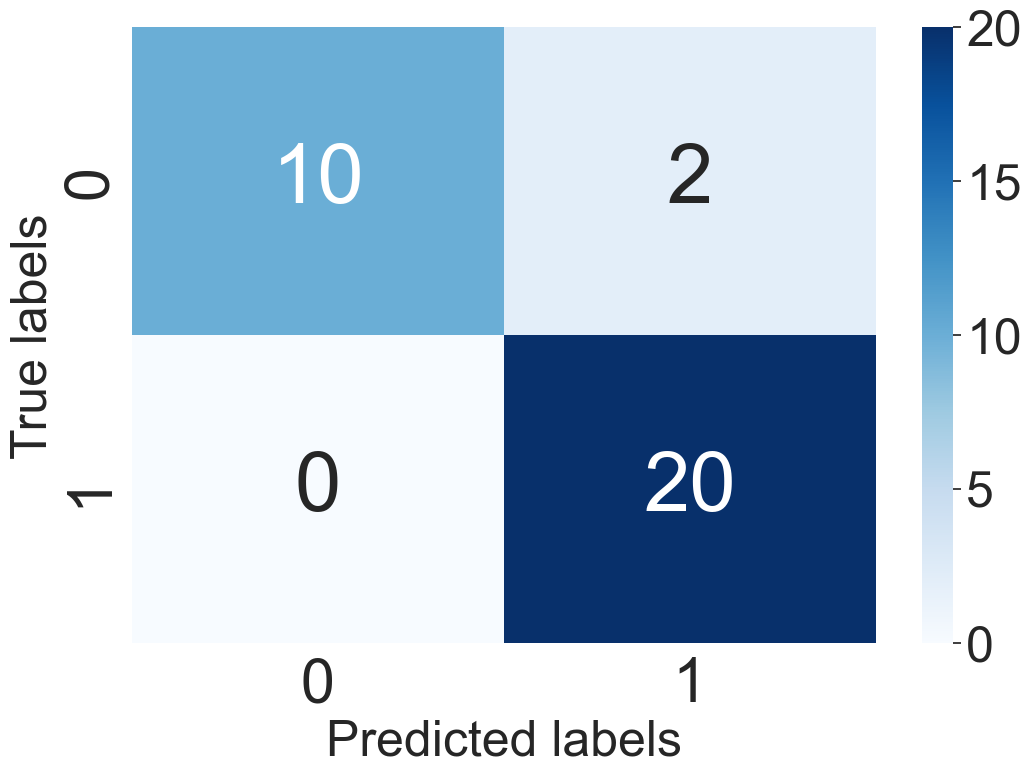

AUC Score: 0.9833333333333334
Sensitivity: 1.0
Accuracy: 0.9375
Confusion Matrix:
[[10  2]
 [ 0 20]]
Specificity: 0.8333333333333334
Precision: 0.9090909090909091


C:\Users\xiao\AppData\Local\Temp\ipykernel_14780\4154860776.py:78: RuntimeWarning: invalid value encountered in scalar divide
  benefit = tp - (fp * threshold_prob / (1 - threshold_prob))


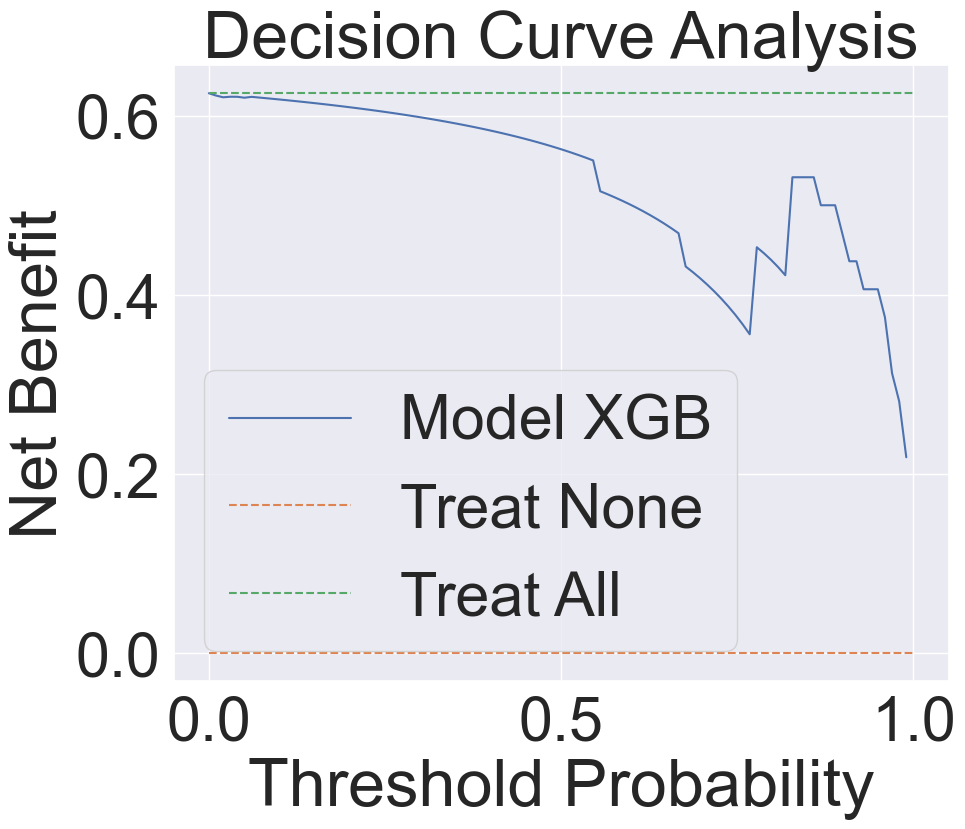

In [1]:
#xgboost
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv4/train_t2_icc_selection.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv4/test_t2_icc_selection.csv')
# 2. 分离特征和标签
x_train = train_data.drop('label', axis=1)
y_train = train_data['label']
x_test = test_data.drop('label', axis=1)
y_test = test_data['label']
clf_XGB = XGBClassifier(use_label_encoder=False)
clf_XGB.fit(x_train, y_train)
# 计算预测概率
y_pred_proba = clf_XGB.predict_proba(x_test)[:, 1]

# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# 计算模型评估指标
y_pred = clf_XGB.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('ICC feature-Xgboost', fontsize=36, y=1.02)  # 调整标题位置
plt.show()
# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)
# 输出模型评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
# print("AUC Score:", auc_score)
print("Confusion Matrix:")
print(conf_matrix)
print("Specificity:", specificity)
print("Precision:", precision)

import numpy as np
import matplotlib.pyplot as plt

def calculate_net_benefit(tp, fp, total, threshold_prob):
    # Calculate the net benefit
    benefit = tp - (fp * threshold_prob / (1 - threshold_prob))
    return benefit / total

def decision_curve_analysis(y_true, y_pred_proba, thresholds=np.linspace(0, 1, 100)):
    # Calculate true positives, false positives, and total instances
    total = len(y_true)
    net_benefits = []
    for thresh in thresholds:
        # Make predictions at the current threshold
        y_pred = y_pred_proba >= thresh
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        # Calculate net benefit
        nb = calculate_net_benefit(tp, fp, total, thresh)
        net_benefits.append(nb)
    return thresholds, net_benefits

# Assume y_test and y_pred_proba are available from your previous code
thresholds, net_benefits = decision_curve_analysis(y_test, y_pred_proba)

# Plotting the decision curve
plt.figure(figsize=(10, 8))
plt.plot(thresholds, net_benefits, label='Model XGB')
plt.plot([0, 1], [0, 0], linestyle='--', label='Treat None')
plt.plot([0, 1], [np.mean(y_test), np.mean(y_test)], linestyle='--', label='Treat All')
plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Decision Curve Analysis')
plt.legend(fon)
plt.show()


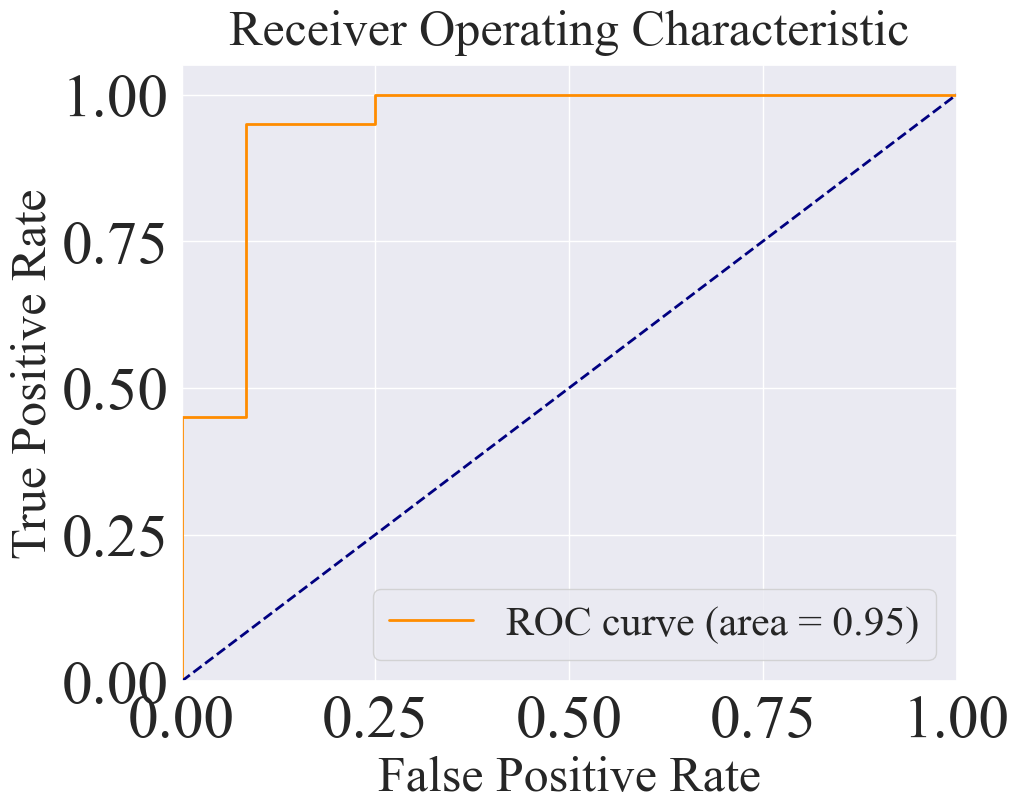

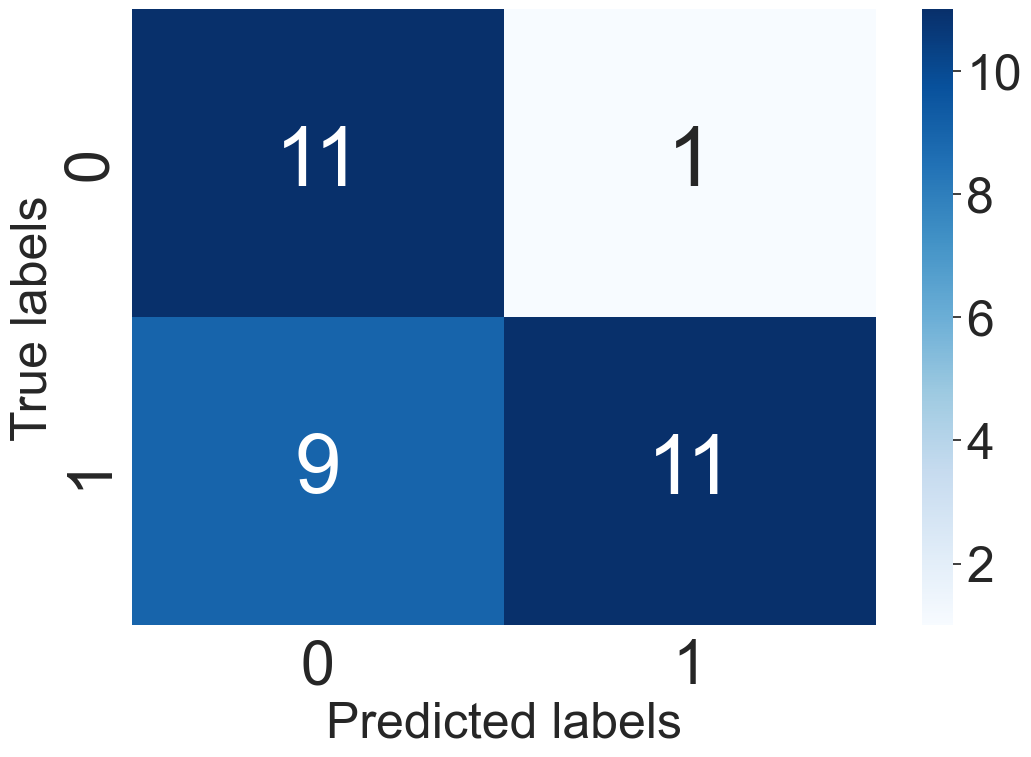

AUC Score: 0.9458333333333333
Sensitivity: 0.55
Accuracy: 0.6875
Confusion Matrix:
[[11  1]
 [ 9 11]]
Specificity: 0.9166666666666666
Precision: 0.9166666666666666


C:\Users\xiao\AppData\Local\Temp\ipykernel_10356\2975885146.py:89: RuntimeWarning: divide by zero encountered in scalar divide
  return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))
C:\Users\xiao\AppData\Local\Temp\ipykernel_10356\2975885146.py:89: RuntimeWarning: invalid value encountered in scalar multiply
  return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))


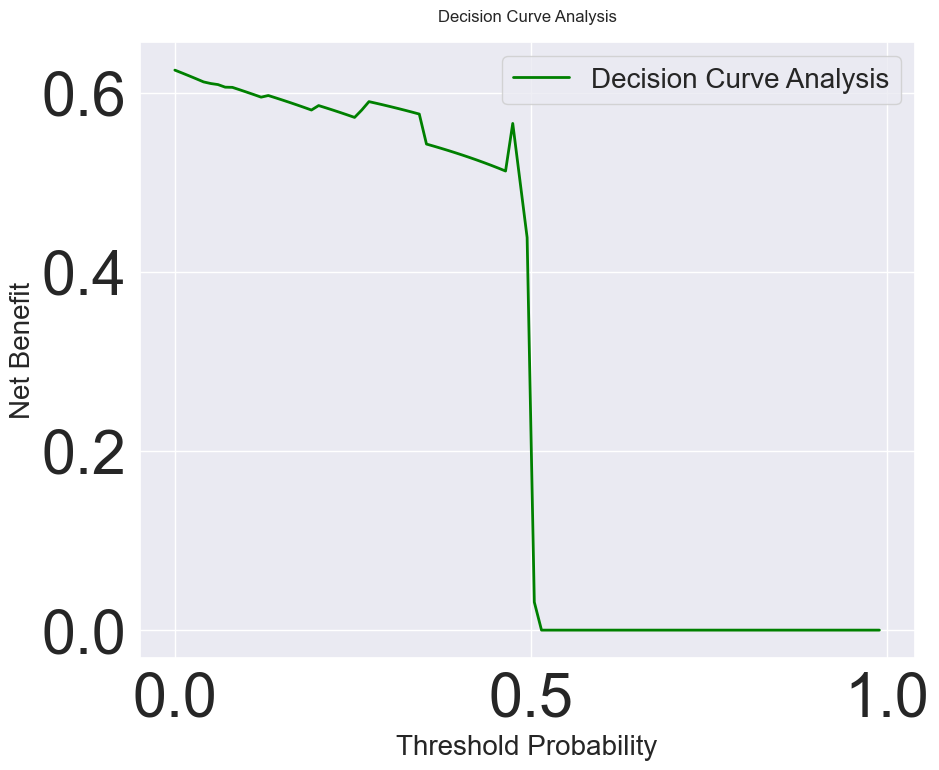

In [10]:
#LR
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv4/train_t2_icc_selection.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv4/test_t2_icc_selection.csv')
# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 3. 初始化并训练逻辑回归模型
model = LogisticRegression(penalty="l2",solver="liblinear",C=1.0,max_iter=100)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
# 4. 使用测试集评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('ICC feature-Logistic regression', fontsize=36, y=1.02)  # 调整标题位置
plt.show()
# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)
# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

print("Specificity:", specificity)
print("Precision:", precision)


import numpy as np

def calculate_net_benefit(tp, fp, threshold, num_cases):
    """
    Calculate the net benefit for a given threshold.

    Args:
    tp (int): True positives.
    fp (int): False positives.
    threshold (float): Threshold probability.
    num_cases (int): Total number of cases.

    Returns:
    float: Net benefit.
    """
    return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))

def decision_curve_analysis(y_true, y_pred_proba, thresholds):
    """
    Perform decision curve analysis.

    Args:
    y_true (array-like): True labels.
    y_pred_proba (array-like): Predicted probabilities.
    thresholds (array-like): Range of threshold probabilities.

    Returns:
    array-like: Net benefits for each threshold.
    """
    num_cases = len(y_true)
    net_benefits = []
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        net_benefit = calculate_net_benefit(tp, fp, threshold, num_cases)
        net_benefits.append(net_benefit)
    return net_benefits

# Usage
thresholds = np.linspace(0, 1, 100)  # Define a range of threshold probabilities
dca_values = decision_curve_analysis(y_test, y_pred_proba, thresholds)

# Plot Decision Curve Analysis
plt.figure(figsize=(10, 8))
plt.plot(thresholds, dca_values, color='green', lw=2, label='Decision Curve Analysis')
plt.xlabel('Threshold Probability', fontsize=20)
plt.ylabel('Net Benefit', fontsize=20)
plt.title('Decision Curve Analysis', fontsize=12, y=1.02)
plt.legend(loc="upper right", fontsize=20)
plt.grid(True)
plt.show()



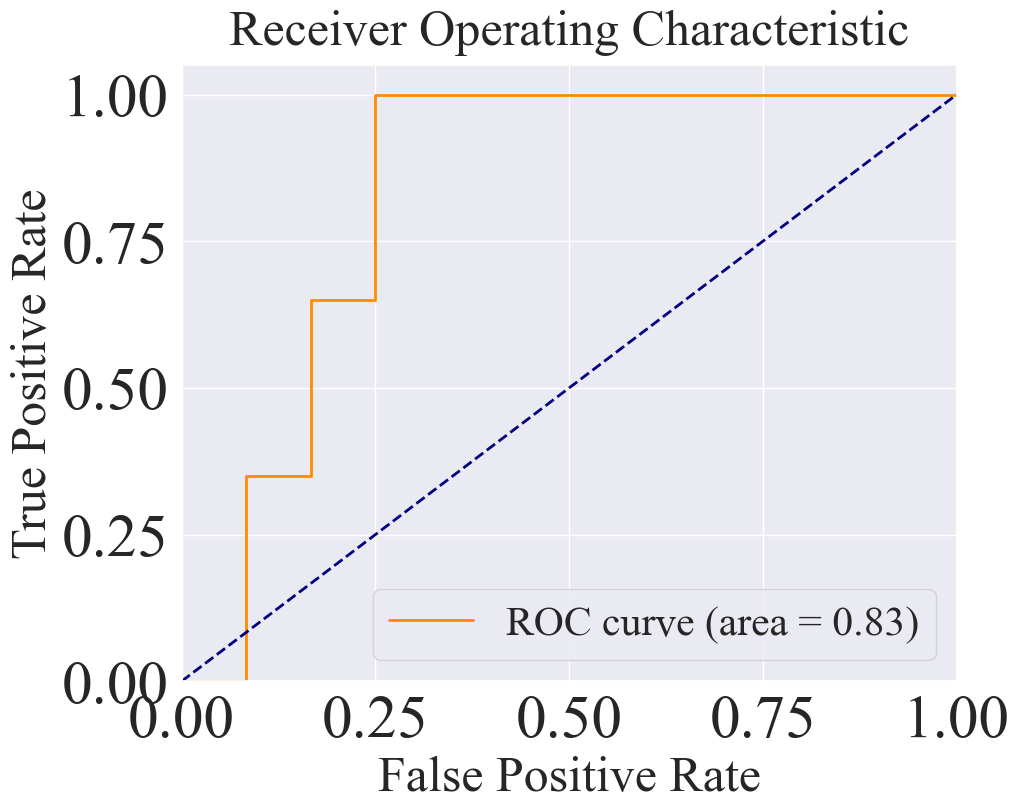

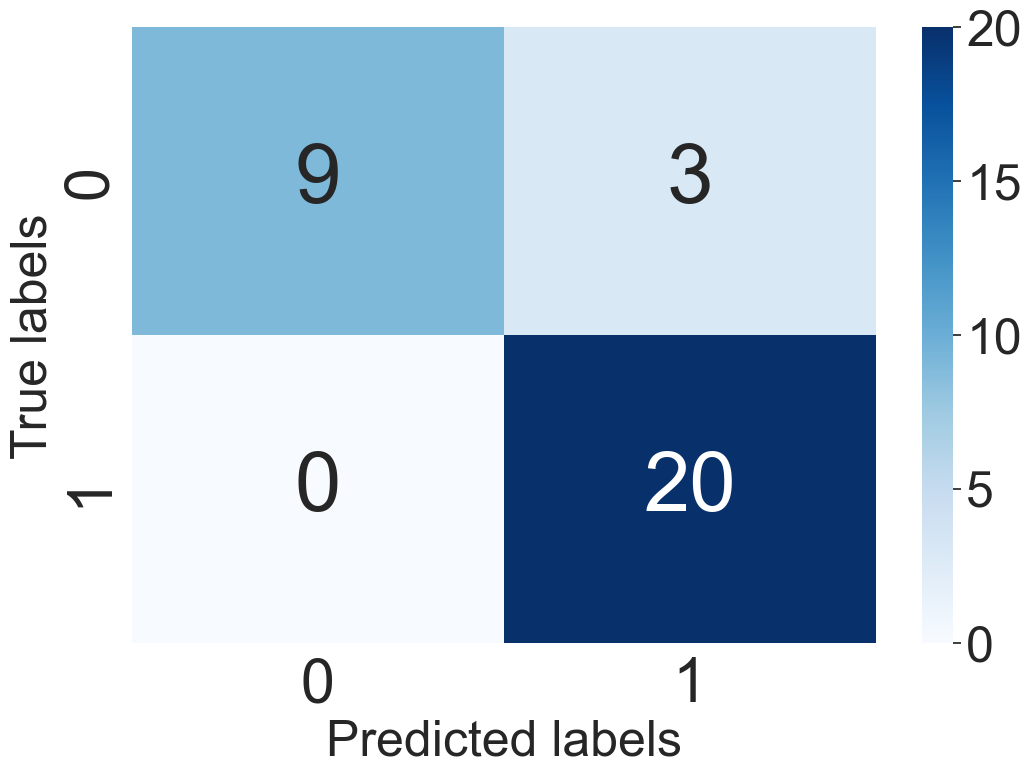

AUC Score: 0.8333333333333334
Sensitivity: 1.0
Accuracy: 0.90625
Confusion Matrix:
[[ 9  3]
 [ 0 20]]
Specificity: 0.75
Precision: 0.8695652173913043


C:\Users\xiao\AppData\Local\Temp\ipykernel_10356\130448814.py:90: RuntimeWarning: divide by zero encountered in scalar divide
  return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))
C:\Users\xiao\AppData\Local\Temp\ipykernel_10356\130448814.py:90: RuntimeWarning: invalid value encountered in scalar multiply
  return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))


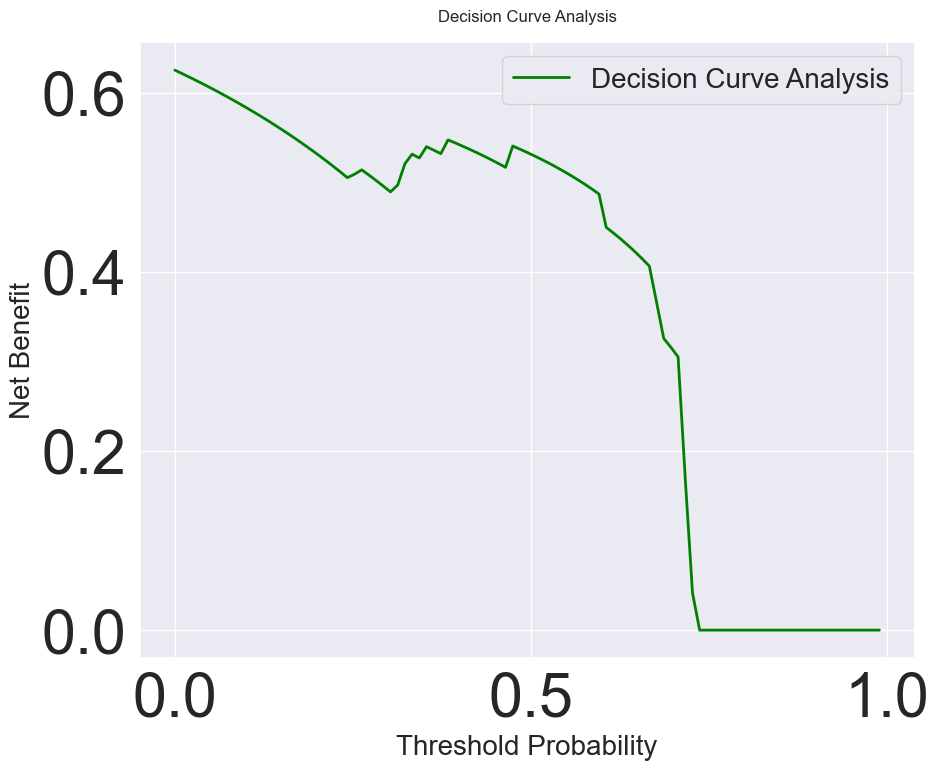

In [9]:
#svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
# 设置全局默认字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'
# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv4/train_t2_icc_selection.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv4/test_t2_icc_selection.csv')
# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']
# 3. 初始化并训练支持向量机模型
# model = SVC(probability=True)
model = SVC(kernel='rbf', C=1.0,probability=True)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
# 4. 使用测试集评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# auc_score = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)
# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=36)
plt.ylabel('True Positive Rate', fontsize=36)
plt.title('Receiver Operating Characteristic', fontsize=36, y=1.02)
plt.legend(loc="lower right", prop={'size': 30})
plt.show()

print("\n")
# 6. 绘制混淆矩阵
plt.figure(figsize=(12, 8))
sns.set(font_scale=4)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 60})#中间
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=36)
plt.xlabel('Predicted labels', fontsize=36)
plt.ylabel('True labels', fontsize=36)
# plt.title('ICC feature-Support vector machine', fontsize=36, y=1.02)  # 调整标题位置
plt.show()
# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

print("Specificity:", specificity)
print("Precision:", precision)

import numpy as np

def calculate_net_benefit(tp, fp, threshold, num_cases):
    """
    Calculate the net benefit for a given threshold.

    Args:
    tp (int): True positives.
    fp (int): False positives.
    threshold (float): Threshold probability.
    num_cases (int): Total number of cases.

    Returns:
    float: Net benefit.
    """
    return (tp / num_cases) - (fp / num_cases) * (threshold / (1 - threshold))

def decision_curve_analysis(y_true, y_pred_proba, thresholds):
    """
    Perform decision curve analysis.

    Args:
    y_true (array-like): True labels.
    y_pred_proba (array-like): Predicted probabilities.
    thresholds (array-like): Range of threshold probabilities.

    Returns:
    array-like: Net benefits for each threshold.
    """
    num_cases = len(y_true)
    net_benefits = []
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        net_benefit = calculate_net_benefit(tp, fp, threshold, num_cases)
        net_benefits.append(net_benefit)
    return net_benefits

# Usage
thresholds = np.linspace(0, 1, 100)  # Define a range of threshold probabilities
dca_values = decision_curve_analysis(y_test, y_pred_proba, thresholds)

# Plot Decision Curve Analysis
plt.figure(figsize=(10, 8))
plt.plot(thresholds, dca_values, color='green', lw=2, label='Decision Curve Analysis')
plt.xlabel('Threshold Probability', fontsize=20)
plt.ylabel('Net Benefit', fontsize=20)
plt.title('Decision Curve Analysis', fontsize=12, y=1.02)
plt.legend(loc="upper right", fontsize=20)
plt.grid(True)
plt.show()



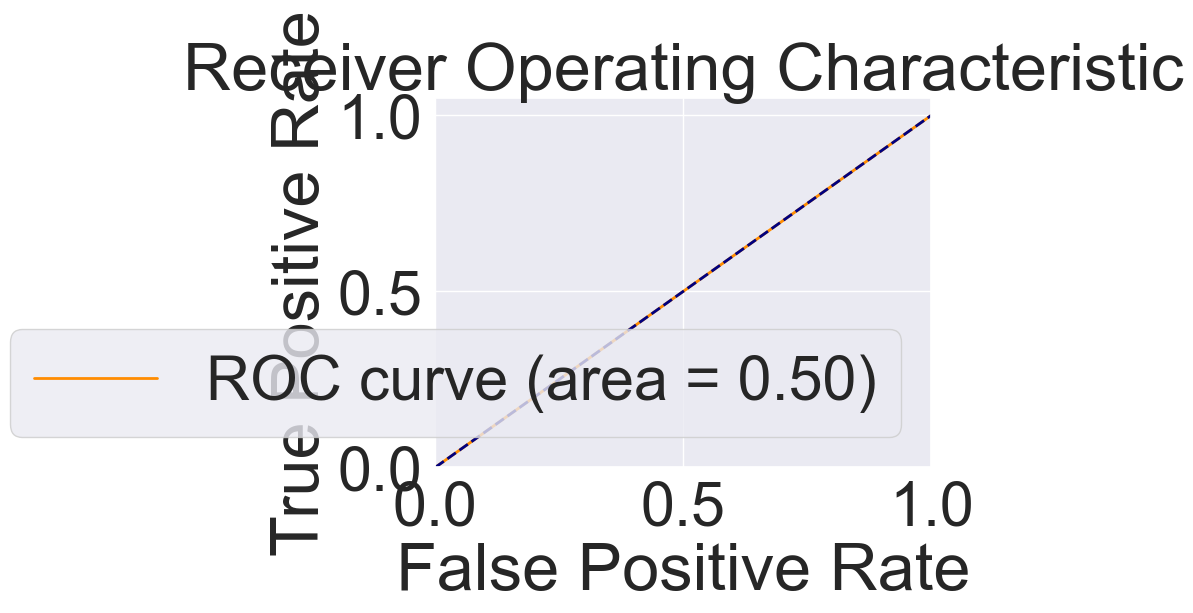

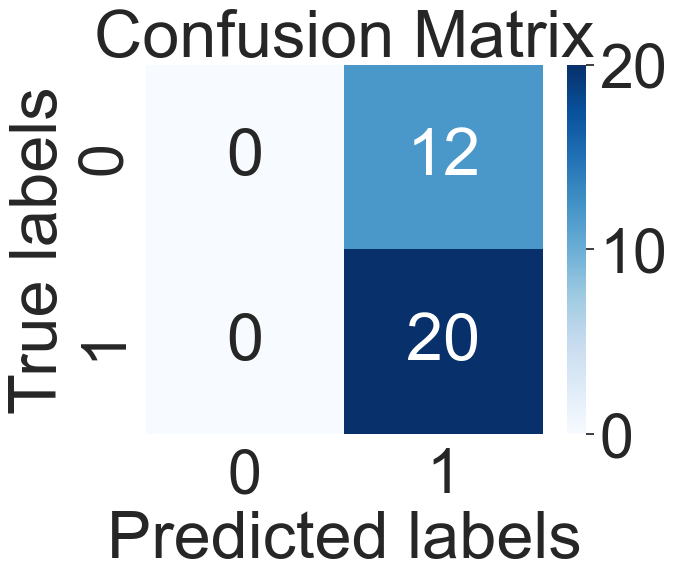

AUC Score: 0.5
Sensitivity: 1.0
Accuracy: 0.625
Confusion Matrix:
[[ 0 12]
 [ 0 20]]
Specificity: 0.0
Precision: 0.625


In [7]:
#mlp
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv4/train_t2_icc_selection.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv4/test_t2_icc_selection.csv')

# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 3. 初始化并训练MLP模型
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh',max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# 4. 使用测试集评估模型
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)

y_pred = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 5. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 6. 绘制混淆矩阵
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)

# 7. 输出评估指标
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Specificity:", specificity)
print("Precision:", precision)


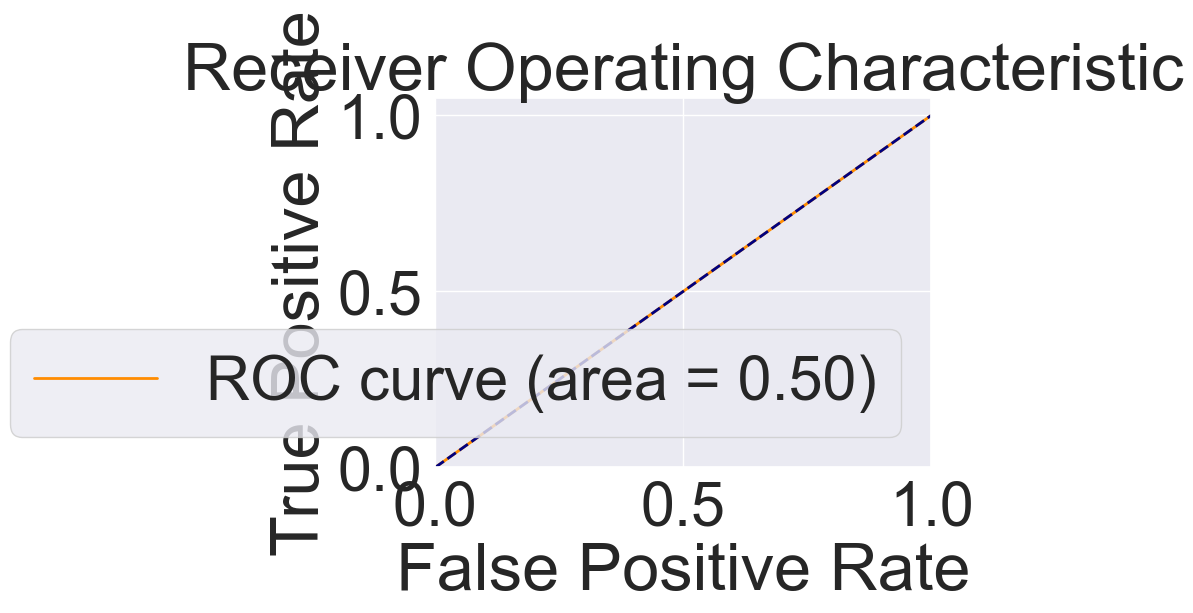

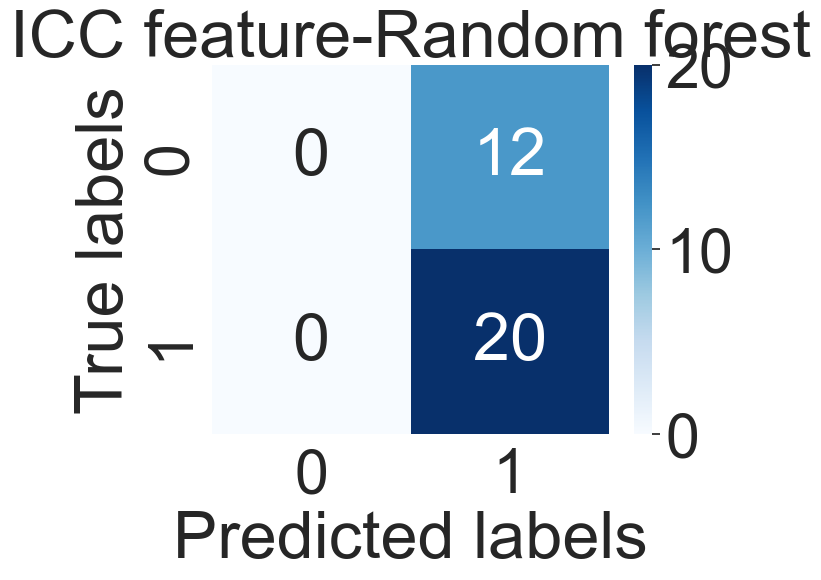

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'max_iter': 200}
AUC Score: 0.5
Sensitivity: 1.0
Accuracy: 0.625
Confusion Matrix:
[[ 0 12]
 [ 0 20]]
Specificity: 0.0
Precision: 0.625


In [8]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取训练集和测试集CSV文件
train_data = pd.read_csv('D:/radiomic1/glioma/csv4/train_t2_icc_selection.csv')
test_data = pd.read_csv('D:/radiomic1/glioma/csv4/test_t2_icc_selection.csv')

# 2. 分离特征和标签
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 3. 定义MLP模型
mlp_model = MLPClassifier(random_state=42)

# 4. 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100,100)],
    'max_iter': [200, 300, 400, 500],
    'activation': ['relu', 'tanh', 'logistic'],
}

# 5. 进行网格搜索
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 6. 获取最佳模型
best_model = grid_search.best_estimator_

# 7. 使用测试集评估模型
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)

# 8. 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 9. 绘制混淆矩阵
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('ICC feature-Random forest')
plt.show()

# 计算 specificity
specificity = tn / (tn + fp)

# 计算 precision
precision = tp / (tp + fp)

# 10. 输出评估指标和最佳参数
print("Best Parameters:", grid_search.best_params_)
print("AUC Score:", auc_score)
print("Sensitivity:", sensitivity)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Specificity:", specificity)
print("Precision:", precision)
